# Libraries

In [59]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, StandardScaler
from scipy.stats import chi2_contingency

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Data Understanding

In [3]:
df= pd.read_csv(r"D:\TEL U\SEM 7 TELU\TA\TA\data\FIX_DATASETS.csv", sep= ';', low_memory=False)
df.head()

,patient_id,age_at_diagnosis,type_of_breast_surgery,cancer_type,cancer_type_detailed,cellularity,chemotherapy,pam50_+_claudin-low_subtype,cohort,er_status_measured_by_ihc,...,mtap_mut,ppp2cb_mut,smarcd1_mut,nras_mut,ndfip1_mut,hras_mut,prps2_mut,smarcb1_mut,stmn2_mut,siah1_mut
0,0,75.65,MASTECTOMY,Breast Cancer,Breast Invasive Ductal Carcinoma,NaN,0,claudin-low,1.0,Positve,...,0,0,0,0,0,0,0,0,0,0
1,2,43.19,BREAST CONSERVING,Breast Cancer,Breast Invasive Ductal Carcinoma,High,0,LumA,1.0,Positve,...,0,0,0,0,0,0,0,0,0,0
2,5,48.87,MASTECTOMY,Breast Cancer,Breast Invasive Ductal Carcinoma,High,1,LumB,1.0,Positve,...,0,0,0,0,0,0,0,0,0,0
3,6,47.68,MASTECTOMY,Breast Cancer,Breast Mixed Ductal and Lobular Carcinoma,Moderate,1,LumB,1.0,Positve,...,0,0,0,0,0,0,0,0,0,0
4,8,76.97,MASTECTOMY,Breast Cancer,Breast Mixed Ductal and Lobular Carcinoma,High,1,LumB,1.0,Positve,...,0,0,0,0,0,0,0,0,0,0


In [4]:
df.shape

(1904, 693)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1904 entries, 0 to 1903
Columns: 693 entries, patient_id to siah1_mut
dtypes: float64(7), int64(5), object(681)
memory usage: 10.1+ MB


In [6]:
print(df.nunique().to_string())

patient_id                        1904
age_at_diagnosis                  1572
type_of_breast_surgery               2
cancer_type                          2
cancer_type_detailed                 6
cellularity                          3
chemotherapy                         2
pam50_+_claudin-low_subtype          7
cohort                               5
er_status_measured_by_ihc            2
er_status                            2
neoplasm_histologic_grade            3
her2_status_measured_by_snp6         4
her2_status                          2
tumor_other_histologic_subtype       8
hormone_therapy                      2
inferred_menopausal_state            2
integrative_cluster                 11
primary_tumor_laterality             2
lymph_nodes_examined_positive       31
mutation_count                      30
nottingham_prognostic_index        310
oncotree_code                        6
overall_survival_months           1680
overall_survival                     2
pr_status                

In [7]:
print(df.isnull().sum().to_string())

patient_id                          0
age_at_diagnosis                    0
type_of_breast_surgery             22
cancer_type                         0
cancer_type_detailed               15
cellularity                        54
chemotherapy                        0
pam50_+_claudin-low_subtype         0
cohort                              0
er_status_measured_by_ihc          30
er_status                           0
neoplasm_histologic_grade          72
her2_status_measured_by_snp6        0
her2_status                         0
tumor_other_histologic_subtype     15
hormone_therapy                     0
inferred_menopausal_state           0
integrative_cluster                 0
primary_tumor_laterality          106
lymph_nodes_examined_positive       0
mutation_count                     45
nottingham_prognostic_index         0
oncotree_code                      15
overall_survival_months             0
overall_survival                    0
pr_status                           0
radio_therap

In [8]:
print(df.duplicated().sum())

0


# Data Prep

In [9]:
df = df.drop(['patient_id'], axis=1)

## Handling Data Types

### Categoricals

In [10]:
categoricals = df.select_dtypes(include='object')
categoricals

,type_of_breast_surgery,cancer_type,cancer_type_detailed,cellularity,pam50_+_claudin-low_subtype,er_status_measured_by_ihc,er_status,her2_status_measured_by_snp6,her2_status,tumor_other_histologic_subtype,...,mtap_mut,ppp2cb_mut,smarcd1_mut,nras_mut,ndfip1_mut,hras_mut,prps2_mut,smarcb1_mut,stmn2_mut,siah1_mut
0,MASTECTOMY,Breast Cancer,Breast Invasive Ductal Carcinoma,NaN,claudin-low,Positve,Positive,NEUTRAL,Negative,Ductal/NST,...,0,0,0,0,0,0,0,0,0,0
1,BREAST CONSERVING,Breast Cancer,Breast Invasive Ductal Carcinoma,High,LumA,Positve,Positive,NEUTRAL,Negative,Ductal/NST,...,0,0,0,0,0,0,0,0,0,0
2,MASTECTOMY,Breast Cancer,Breast Invasive Ductal Carcinoma,High,LumB,Positve,Positive,NEUTRAL,Negative,Ductal/NST,...,0,0,0,0,0,0,0,0,0,0
3,MASTECTOMY,Breast Cancer,Breast Mixed Ductal and Lobular Carcinoma,Moderate,LumB,Positve,Positive,NEUTRAL,Negative,Mixed,...,0,0,0,0,0,0,0,0,0,0
4,MASTECTOMY,Breast Cancer,Breast Mixed Ductal and Lobular Carcinoma,High,LumB,Positve,Positive,NEUTRAL,Negative,Mixed,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1899,BREAST CONSERVING,Breast Cancer,Breast Invasive Lobular Carcinoma,High,LumA,Positve,Positive,NEUTRAL,Negative,Lobular,...,0,0,0,0,0,0,0,0,0,0
1900,MASTECTOMY,Breast Cancer,Breast Invasive Ductal Carcinoma,High,LumB,Positve,Positive,GAIN,Positive,Ductal/NST,...,0,0,0,0,0,0,0,0,0,0
1901,MASTECTOMY,Breast Cancer,Breast Invasive Ductal Carcinoma,High,LumB,Positve,Positive,NEUTRAL,Negative,Ductal/NST,...,0,0,0,0,0,0,0,0,0,0
1902,MASTECTOMY,Breast Cancer,Breast Invasive Ductal Carcinoma,Moderate,LumB,Positve,Positive,NEUTRAL,Negative,Ductal/NST,...,0,0,0,0,0,0,0,0,0,0


In [11]:
categoricals.shape

(1904, 681)

In [12]:
#drop the string numeric on the categorical section
columns_to_drop = categoricals.loc[:, 'brca1':'ugt2b7']
categoricals = categoricals.drop(columns=columns_to_drop)
categoricals

,type_of_breast_surgery,cancer_type,cancer_type_detailed,cellularity,pam50_+_claudin-low_subtype,er_status_measured_by_ihc,er_status,her2_status_measured_by_snp6,her2_status,tumor_other_histologic_subtype,...,mtap_mut,ppp2cb_mut,smarcd1_mut,nras_mut,ndfip1_mut,hras_mut,prps2_mut,smarcb1_mut,stmn2_mut,siah1_mut
0,MASTECTOMY,Breast Cancer,Breast Invasive Ductal Carcinoma,NaN,claudin-low,Positve,Positive,NEUTRAL,Negative,Ductal/NST,...,0,0,0,0,0,0,0,0,0,0
1,BREAST CONSERVING,Breast Cancer,Breast Invasive Ductal Carcinoma,High,LumA,Positve,Positive,NEUTRAL,Negative,Ductal/NST,...,0,0,0,0,0,0,0,0,0,0
2,MASTECTOMY,Breast Cancer,Breast Invasive Ductal Carcinoma,High,LumB,Positve,Positive,NEUTRAL,Negative,Ductal/NST,...,0,0,0,0,0,0,0,0,0,0
3,MASTECTOMY,Breast Cancer,Breast Mixed Ductal and Lobular Carcinoma,Moderate,LumB,Positve,Positive,NEUTRAL,Negative,Mixed,...,0,0,0,0,0,0,0,0,0,0
4,MASTECTOMY,Breast Cancer,Breast Mixed Ductal and Lobular Carcinoma,High,LumB,Positve,Positive,NEUTRAL,Negative,Mixed,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1899,BREAST CONSERVING,Breast Cancer,Breast Invasive Lobular Carcinoma,High,LumA,Positve,Positive,NEUTRAL,Negative,Lobular,...,0,0,0,0,0,0,0,0,0,0
1900,MASTECTOMY,Breast Cancer,Breast Invasive Ductal Carcinoma,High,LumB,Positve,Positive,GAIN,Positive,Ductal/NST,...,0,0,0,0,0,0,0,0,0,0
1901,MASTECTOMY,Breast Cancer,Breast Invasive Ductal Carcinoma,High,LumB,Positve,Positive,NEUTRAL,Negative,Ductal/NST,...,0,0,0,0,0,0,0,0,0,0
1902,MASTECTOMY,Breast Cancer,Breast Invasive Ductal Carcinoma,Moderate,LumB,Positve,Positive,NEUTRAL,Negative,Ductal/NST,...,0,0,0,0,0,0,0,0,0,0


In [13]:
categoricals.shape

(1904, 192)

In [14]:
#object to category
categoricals = categoricals.astype({col: 'category' for col in categoricals.select_dtypes(include='object').columns})

In [15]:
categoricals.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1904 entries, 0 to 1903
Columns: 192 entries, type_of_breast_surgery to siah1_mut
dtypes: category(192)
memory usage: 781.0 KB


In [16]:
print(categoricals.isnull().sum().to_string())

type_of_breast_surgery             22
cancer_type                         0
cancer_type_detailed               15
cellularity                        54
pam50_+_claudin-low_subtype         0
er_status_measured_by_ihc          30
er_status                           0
her2_status_measured_by_snp6        0
her2_status                         0
tumor_other_histologic_subtype     15
inferred_menopausal_state           0
integrative_cluster                 0
primary_tumor_laterality          106
nottingham_prognostic_index         0
oncotree_code                      15
overall_survival_months             0
pr_status                           0
3-gene_classifier_subtype         204
death_from_cancer                   1
pik3ca_mut                          0
tp53_mut                            0
muc16_mut                           0
ahnak2_mut                          0
kmt2c_mut                           0
syne1_mut                           0
gata3_mut                           0
map3k1_mut  

### Numericals

In [17]:
numericals = df.loc[:, 'brca1':'ugt2b7'].columns
df[numericals] = df[numericals].apply(pd.to_numeric, errors='coerce')

In [18]:
print(df[numericals].dtypes.to_string())

brca1        float64
brca2        float64
palb2        float64
pten         float64
tp53         float64
atm          float64
cdh1         float64
chek2        float64
nbn          float64
nf1          float64
stk11        float64
bard1        float64
mlh1         float64
msh2         float64
msh6         float64
pms2         float64
epcam        float64
rad51c       float64
rad51d       float64
rad50        float64
rb1          float64
rbl1         float64
rbl2         float64
ccna1        float64
ccnb1        float64
cdk1         float64
ccne1        float64
cdk2         float64
cdc25a       float64
ccnd1        float64
cdk4         float64
cdk6         float64
ccnd2        float64
cdkn2a       float64
cdkn2b       float64
myc          float64
cdkn1a       float64
cdkn1b       float64
e2f1         float64
e2f2         float64
e2f3         float64
e2f4         float64
e2f5         float64
e2f6         float64
e2f7         float64
e2f8         float64
src          float64
jak1         

In [19]:
numericals = df.loc[:, 'brca1':'ugt2b7']

In [20]:
numericals

,brca1,brca2,palb2,pten,tp53,atm,cdh1,chek2,nbn,nf1,...,srd5a1,srd5a2,srd5a3,st7,star,tnk2,tulp4,ugt2b15,ugt2b17,ugt2b7
0,-1.3990,-0.5738,-16.2170,14.5240,0.3504,11.5170,0.0348,0.1266,-0.8361,-0.8578,...,-11.8770,-0.0194,-16.3450,-0.2142,-0.5698,-11.7410,-14.7790,-0.5954,-0.8847,-0.3354
1,-1.3800,0.2777,-12.1540,0.5296,-0.0136,-0.2659,13.5940,0.7961,0.5419,-26.0590,...,-0.4412,0.4534,0.4068,0.7634,0.0231,0.9121,-0.9538,-0.2264,0.5398,-0.8920
2,0.0670,-0.8426,0.2114,-0.3326,0.5141,-0.0803,11.3980,0.4187,-0.4030,-11.3050,...,-0.5381,0.0668,0.8344,17.2270,0.4024,-37.1720,-15.5380,13.7010,-0.1078,0.3655
3,0.6744,-0.5428,-16.5920,0.6369,16.7080,-0.8880,12.4910,-11.8890,-0.4174,-0.6165,...,-0.5630,-0.7078,0.8228,0.6819,-0.1948,-23.2860,-0.9924,-0.3154,0.2320,-0.4828
4,12.9320,-0.9039,-0.7219,0.2168,0.3484,0.3897,0.9131,0.9356,0.7675,-0.2940,...,-0.5845,-0.3544,-1.0150,22.9610,0.1817,-0.1572,0.0427,50.0480,38.4760,13.2230
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1899,0.1563,0.5543,-0.6149,0.4572,13.8220,-0.0537,-0.1323,0.2837,-0.0726,-0.5500,...,0.7859,15.3040,11.1960,0.8116,0.0958,-12.6440,-0.3566,-0.2615,-0.6371,-0.5540
1900,0.1343,0.9128,13.0170,0.7383,0.1841,0.0028,0.1243,2.2040,-0.6190,-0.8681,...,-0.5294,-0.6610,-0.1610,0.2251,0.5127,-0.3412,-10.7030,-0.6950,0.0641,-0.8863
1901,18.1070,-0.2608,0.4006,-0.2985,0.0356,-0.1620,15.4860,15.3090,-13.6530,-0.2529,...,-0.1457,-0.5194,23.9680,0.5917,-0.8643,-13.5410,-18.0760,-0.1840,0.0967,-0.6264
1902,-12.7460,-17.6950,-0.3454,-0.3850,0.6689,14.5310,10.9560,-0.0948,-0.6188,-19.4670,...,-0.6380,-15.2750,1.1070,0.2194,14.3170,-0.6985,-0.6046,-0.4915,-0.2847,-0.8041


In [21]:
#int to float
df = df.astype({col: 'float64' for col in df.select_dtypes(include='int64').columns})

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1904 entries, 0 to 1903
Columns: 692 entries, age_at_diagnosis to siah1_mut
dtypes: float64(500), object(192)
memory usage: 10.1+ MB


In [23]:
print((df.dtypes).to_string())

age_at_diagnosis                  float64
type_of_breast_surgery             object
cancer_type                        object
cancer_type_detailed               object
cellularity                        object
chemotherapy                      float64
pam50_+_claudin-low_subtype        object
cohort                            float64
er_status_measured_by_ihc          object
er_status                          object
neoplasm_histologic_grade         float64
her2_status_measured_by_snp6       object
her2_status                        object
tumor_other_histologic_subtype     object
hormone_therapy                   float64
inferred_menopausal_state          object
integrative_cluster                object
primary_tumor_laterality           object
lymph_nodes_examined_positive     float64
mutation_count                    float64
nottingham_prognostic_index        object
oncotree_code                      object
overall_survival_months            object
overall_survival                  

In [24]:
numericals2= df[['tumor_stage', 'tumor_size', 'radio_therapy', 'overall_survival', 'mutation_count', 'lymph_nodes_examined_positive', 'hormone_therapy', 'neoplasm_histologic_grade', 'cohort', 'chemotherapy', 'age_at_diagnosis']]

In [25]:
print(type(numericals))
print(type(numericals2))

<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.frame.DataFrame'>


In [26]:
numericals2

,tumor_stage,tumor_size,radio_therapy,overall_survival,mutation_count,lymph_nodes_examined_positive,hormone_therapy,neoplasm_histologic_grade,cohort,chemotherapy,age_at_diagnosis
0,2.0,22.0,1.0,1.0,NaN,10.0,1.0,3.0,1.0,0.0,75.65
1,1.0,10.0,1.0,1.0,2.0,0.0,1.0,3.0,1.0,0.0,43.19
2,2.0,15.0,0.0,0.0,2.0,1.0,1.0,2.0,1.0,1.0,48.87
3,2.0,25.0,1.0,1.0,1.0,3.0,1.0,2.0,1.0,1.0,47.68
4,2.0,40.0,1.0,0.0,2.0,8.0,1.0,3.0,1.0,1.0,76.97
...,...,...,...,...,...,...,...,...,...,...,...
1899,NaN,25.0,1.0,1.0,4.0,1.0,1.0,3.0,4.0,0.0,43.10
1900,NaN,20.0,1.0,0.0,6.0,1.0,0.0,3.0,4.0,0.0,42.88
1901,NaN,25.0,1.0,0.0,4.0,45.0,1.0,3.0,4.0,0.0,62.90
1902,NaN,25.0,0.0,0.0,15.0,12.0,1.0,2.0,4.0,0.0,61.16


In [27]:
numericals = pd.DataFrame(numericals)
numericals2 = pd.DataFrame(numericals2)

In [28]:
numericals = pd.concat([numericals, numericals2], axis=1)

In [29]:
numericals

,brca1,brca2,palb2,pten,tp53,atm,cdh1,chek2,nbn,nf1,...,tumor_size,radio_therapy,overall_survival,mutation_count,lymph_nodes_examined_positive,hormone_therapy,neoplasm_histologic_grade,cohort,chemotherapy,age_at_diagnosis
0,-1.3990,-0.5738,-16.2170,14.5240,0.3504,11.5170,0.0348,0.1266,-0.8361,-0.8578,...,22.0,1.0,1.0,NaN,10.0,1.0,3.0,1.0,0.0,75.65
1,-1.3800,0.2777,-12.1540,0.5296,-0.0136,-0.2659,13.5940,0.7961,0.5419,-26.0590,...,10.0,1.0,1.0,2.0,0.0,1.0,3.0,1.0,0.0,43.19
2,0.0670,-0.8426,0.2114,-0.3326,0.5141,-0.0803,11.3980,0.4187,-0.4030,-11.3050,...,15.0,0.0,0.0,2.0,1.0,1.0,2.0,1.0,1.0,48.87
3,0.6744,-0.5428,-16.5920,0.6369,16.7080,-0.8880,12.4910,-11.8890,-0.4174,-0.6165,...,25.0,1.0,1.0,1.0,3.0,1.0,2.0,1.0,1.0,47.68
4,12.9320,-0.9039,-0.7219,0.2168,0.3484,0.3897,0.9131,0.9356,0.7675,-0.2940,...,40.0,1.0,0.0,2.0,8.0,1.0,3.0,1.0,1.0,76.97
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1899,0.1563,0.5543,-0.6149,0.4572,13.8220,-0.0537,-0.1323,0.2837,-0.0726,-0.5500,...,25.0,1.0,1.0,4.0,1.0,1.0,3.0,4.0,0.0,43.10
1900,0.1343,0.9128,13.0170,0.7383,0.1841,0.0028,0.1243,2.2040,-0.6190,-0.8681,...,20.0,1.0,0.0,6.0,1.0,0.0,3.0,4.0,0.0,42.88
1901,18.1070,-0.2608,0.4006,-0.2985,0.0356,-0.1620,15.4860,15.3090,-13.6530,-0.2529,...,25.0,1.0,0.0,4.0,45.0,1.0,3.0,4.0,0.0,62.90
1902,-12.7460,-17.6950,-0.3454,-0.3850,0.6689,14.5310,10.9560,-0.0948,-0.6188,-19.4670,...,25.0,0.0,0.0,15.0,12.0,1.0,2.0,4.0,0.0,61.16


## Handling Null Values

### Categoricals

In [30]:
print(categoricals.isnull().sum().to_string())

type_of_breast_surgery             22
cancer_type                         0
cancer_type_detailed               15
cellularity                        54
pam50_+_claudin-low_subtype         0
er_status_measured_by_ihc          30
er_status                           0
her2_status_measured_by_snp6        0
her2_status                         0
tumor_other_histologic_subtype     15
inferred_menopausal_state           0
integrative_cluster                 0
primary_tumor_laterality          106
nottingham_prognostic_index         0
oncotree_code                      15
overall_survival_months             0
pr_status                           0
3-gene_classifier_subtype         204
death_from_cancer                   1
pik3ca_mut                          0
tp53_mut                            0
muc16_mut                           0
ahnak2_mut                          0
kmt2c_mut                           0
syne1_mut                           0
gata3_mut                           0
map3k1_mut  

In [31]:
#null values
categoricals = categoricals.fillna(categoricals.mode().iloc[0])
categoricals.isnull().sum()

type_of_breast_surgery         0
cancer_type                    0
cancer_type_detailed           0
cellularity                    0
pam50_+_claudin-low_subtype    0
                              ..
hras_mut                       0
prps2_mut                      0
smarcb1_mut                    0
stmn2_mut                      0
siah1_mut                      0
Length: 192, dtype: int64

In [32]:
#replace 0 to noMut
categoricals = categoricals.replace('0', 'noMut')
categoricals.head()

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_25052\278970225.py:2: FutureWarning: The behavior of Series.replace (and DataFrame.replace) with CategoricalDtype is deprecated. In a future version, replace will only be used for cases that preserve the categories. To change the categories, use ser.cat.rename_categories instead.
  categoricals = categoricals.replace('0', 'noMut')


,type_of_breast_surgery,cancer_type,cancer_type_detailed,cellularity,pam50_+_claudin-low_subtype,er_status_measured_by_ihc,er_status,her2_status_measured_by_snp6,her2_status,tumor_other_histologic_subtype,...,mtap_mut,ppp2cb_mut,smarcd1_mut,nras_mut,ndfip1_mut,hras_mut,prps2_mut,smarcb1_mut,stmn2_mut,siah1_mut
0,MASTECTOMY,Breast Cancer,Breast Invasive Ductal Carcinoma,High,claudin-low,Positve,Positive,NEUTRAL,Negative,Ductal/NST,...,noMut,noMut,noMut,noMut,noMut,noMut,noMut,noMut,noMut,noMut
1,BREAST CONSERVING,Breast Cancer,Breast Invasive Ductal Carcinoma,High,LumA,Positve,Positive,NEUTRAL,Negative,Ductal/NST,...,noMut,noMut,noMut,noMut,noMut,noMut,noMut,noMut,noMut,noMut
2,MASTECTOMY,Breast Cancer,Breast Invasive Ductal Carcinoma,High,LumB,Positve,Positive,NEUTRAL,Negative,Ductal/NST,...,noMut,noMut,noMut,noMut,noMut,noMut,noMut,noMut,noMut,noMut
3,MASTECTOMY,Breast Cancer,Breast Mixed Ductal and Lobular Carcinoma,Moderate,LumB,Positve,Positive,NEUTRAL,Negative,Mixed,...,noMut,noMut,noMut,noMut,noMut,noMut,noMut,noMut,noMut,noMut
4,MASTECTOMY,Breast Cancer,Breast Mixed Ductal and Lobular Carcinoma,High,LumB,Positve,Positive,NEUTRAL,Negative,Mixed,...,noMut,noMut,noMut,noMut,noMut,noMut,noMut,noMut,noMut,noMut


In [33]:
print(categoricals.isnull().sum().to_string())

type_of_breast_surgery            0
cancer_type                       0
cancer_type_detailed              0
cellularity                       0
pam50_+_claudin-low_subtype       0
er_status_measured_by_ihc         0
er_status                         0
her2_status_measured_by_snp6      0
her2_status                       0
tumor_other_histologic_subtype    0
inferred_menopausal_state         0
integrative_cluster               0
primary_tumor_laterality          0
nottingham_prognostic_index       0
oncotree_code                     0
overall_survival_months           0
pr_status                         0
3-gene_classifier_subtype         0
death_from_cancer                 0
pik3ca_mut                        0
tp53_mut                          0
muc16_mut                         0
ahnak2_mut                        0
kmt2c_mut                         0
syne1_mut                         0
gata3_mut                         0
map3k1_mut                        0
ahnak_mut                   

### Numericals

In [34]:
print(numericals.isnull().sum().to_string())

brca1                              5
brca2                              7
palb2                             16
pten                               9
tp53                              17
atm                               12
cdh1                              12
chek2                             14
nbn                               13
nf1                                9
stk11                              7
bard1                             12
mlh1                              11
msh2                               8
msh6                              13
pms2                              12
epcam                             12
rad51c                            10
rad51d                            10
rad50                             12
rb1                               16
rbl1                              11
rbl2                              14
ccna1                              3
ccnb1                             13
cdk1                              18
ccne1                              8
c

In [35]:
numericals = numericals.fillna(numericals.mean())

In [36]:
numericals

,brca1,brca2,palb2,pten,tp53,atm,cdh1,chek2,nbn,nf1,...,tumor_size,radio_therapy,overall_survival,mutation_count,lymph_nodes_examined_positive,hormone_therapy,neoplasm_histologic_grade,cohort,chemotherapy,age_at_diagnosis
0,-1.3990,-0.5738,-16.2170,14.5240,0.3504,11.5170,0.0348,0.1266,-0.8361,-0.8578,...,22.0,1.0,1.0,5.697687,10.0,1.0,3.0,1.0,0.0,75.65
1,-1.3800,0.2777,-12.1540,0.5296,-0.0136,-0.2659,13.5940,0.7961,0.5419,-26.0590,...,10.0,1.0,1.0,2.000000,0.0,1.0,3.0,1.0,0.0,43.19
2,0.0670,-0.8426,0.2114,-0.3326,0.5141,-0.0803,11.3980,0.4187,-0.4030,-11.3050,...,15.0,0.0,0.0,2.000000,1.0,1.0,2.0,1.0,1.0,48.87
3,0.6744,-0.5428,-16.5920,0.6369,16.7080,-0.8880,12.4910,-11.8890,-0.4174,-0.6165,...,25.0,1.0,1.0,1.000000,3.0,1.0,2.0,1.0,1.0,47.68
4,12.9320,-0.9039,-0.7219,0.2168,0.3484,0.3897,0.9131,0.9356,0.7675,-0.2940,...,40.0,1.0,0.0,2.000000,8.0,1.0,3.0,1.0,1.0,76.97
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1899,0.1563,0.5543,-0.6149,0.4572,13.8220,-0.0537,-0.1323,0.2837,-0.0726,-0.5500,...,25.0,1.0,1.0,4.000000,1.0,1.0,3.0,4.0,0.0,43.10
1900,0.1343,0.9128,13.0170,0.7383,0.1841,0.0028,0.1243,2.2040,-0.6190,-0.8681,...,20.0,1.0,0.0,6.000000,1.0,0.0,3.0,4.0,0.0,42.88
1901,18.1070,-0.2608,0.4006,-0.2985,0.0356,-0.1620,15.4860,15.3090,-13.6530,-0.2529,...,25.0,1.0,0.0,4.000000,45.0,1.0,3.0,4.0,0.0,62.90
1902,-12.7460,-17.6950,-0.3454,-0.3850,0.6689,14.5310,10.9560,-0.0948,-0.6188,-19.4670,...,25.0,0.0,0.0,15.000000,12.0,1.0,2.0,4.0,0.0,61.16


In [37]:
# df_factorized = categoricals.apply(lambda x: pd.factorize(x)[0])
# pearson_corr_matrix = df_factorized.corr(method='pearson')
# print(pearson_corr_matrix)

In [38]:
# # Plot the heatmap
# plt.figure(figsize=(8, 6))
# sns.heatmap(pearson_corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1, center=0, linewidths=0.5)

# # Add titles and labels
# plt.title('Pearson Correlation Heatmap for Factorized Categorical Data', fontsize=14)
# plt.show()

In [39]:
# numericals= numericals.corr

### Concat Data

In [40]:
df1 = pd.concat([categoricals, numericals], axis=1)

In [41]:
df1

,type_of_breast_surgery,cancer_type,cancer_type_detailed,cellularity,pam50_+_claudin-low_subtype,er_status_measured_by_ihc,er_status,her2_status_measured_by_snp6,her2_status,tumor_other_histologic_subtype,...,tumor_size,radio_therapy,overall_survival,mutation_count,lymph_nodes_examined_positive,hormone_therapy,neoplasm_histologic_grade,cohort,chemotherapy,age_at_diagnosis
0,MASTECTOMY,Breast Cancer,Breast Invasive Ductal Carcinoma,High,claudin-low,Positve,Positive,NEUTRAL,Negative,Ductal/NST,...,22.0,1.0,1.0,5.697687,10.0,1.0,3.0,1.0,0.0,75.65
1,BREAST CONSERVING,Breast Cancer,Breast Invasive Ductal Carcinoma,High,LumA,Positve,Positive,NEUTRAL,Negative,Ductal/NST,...,10.0,1.0,1.0,2.000000,0.0,1.0,3.0,1.0,0.0,43.19
2,MASTECTOMY,Breast Cancer,Breast Invasive Ductal Carcinoma,High,LumB,Positve,Positive,NEUTRAL,Negative,Ductal/NST,...,15.0,0.0,0.0,2.000000,1.0,1.0,2.0,1.0,1.0,48.87
3,MASTECTOMY,Breast Cancer,Breast Mixed Ductal and Lobular Carcinoma,Moderate,LumB,Positve,Positive,NEUTRAL,Negative,Mixed,...,25.0,1.0,1.0,1.000000,3.0,1.0,2.0,1.0,1.0,47.68
4,MASTECTOMY,Breast Cancer,Breast Mixed Ductal and Lobular Carcinoma,High,LumB,Positve,Positive,NEUTRAL,Negative,Mixed,...,40.0,1.0,0.0,2.000000,8.0,1.0,3.0,1.0,1.0,76.97
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1899,BREAST CONSERVING,Breast Cancer,Breast Invasive Lobular Carcinoma,High,LumA,Positve,Positive,NEUTRAL,Negative,Lobular,...,25.0,1.0,1.0,4.000000,1.0,1.0,3.0,4.0,0.0,43.10
1900,MASTECTOMY,Breast Cancer,Breast Invasive Ductal Carcinoma,High,LumB,Positve,Positive,GAIN,Positive,Ductal/NST,...,20.0,1.0,0.0,6.000000,1.0,0.0,3.0,4.0,0.0,42.88
1901,MASTECTOMY,Breast Cancer,Breast Invasive Ductal Carcinoma,High,LumB,Positve,Positive,NEUTRAL,Negative,Ductal/NST,...,25.0,1.0,0.0,4.000000,45.0,1.0,3.0,4.0,0.0,62.90
1902,MASTECTOMY,Breast Cancer,Breast Invasive Ductal Carcinoma,Moderate,LumB,Positve,Positive,NEUTRAL,Negative,Ductal/NST,...,25.0,0.0,0.0,15.000000,12.0,1.0,2.0,4.0,0.0,61.16


## Feature Correlations

### Numericals

In [42]:
#standarization
scaler = StandardScaler()
numerical_cols = df1.select_dtypes(include=['float64']).columns

scaler.fit(df1[numerical_cols])

StandardScaler()

In [43]:
le_status = LabelEncoder()
df1['cancer_type_detailed'] = le_status.fit_transform(df1['cancer_type_detailed'])

In [44]:
#Filter numerical columns
#numerical_cols = df1.select_dtypes(include=['float64']).columns

#Calculate correlation with the target (e.g., 'overall_survival')
corr_numerical = df1[numerical_cols].corrwith(df1['cancer_type_detailed'])

#Sort and get top 30 numerical correlations
best_numerical_corr30 = corr_numerical.abs().sort_values(ascending=False).head(10)
print(best_numerical_corr30)


neoplasm_histologic_grade    0.183020
aurka                        0.164329
chek1                        0.155601
ccne1                        0.155403
ahnak                        0.153383
e2f2                         0.151198
cdc25a                       0.148028
aph1b                        0.140536
cdh1                         0.139723
gsk3b                        0.139142
dtype: float64


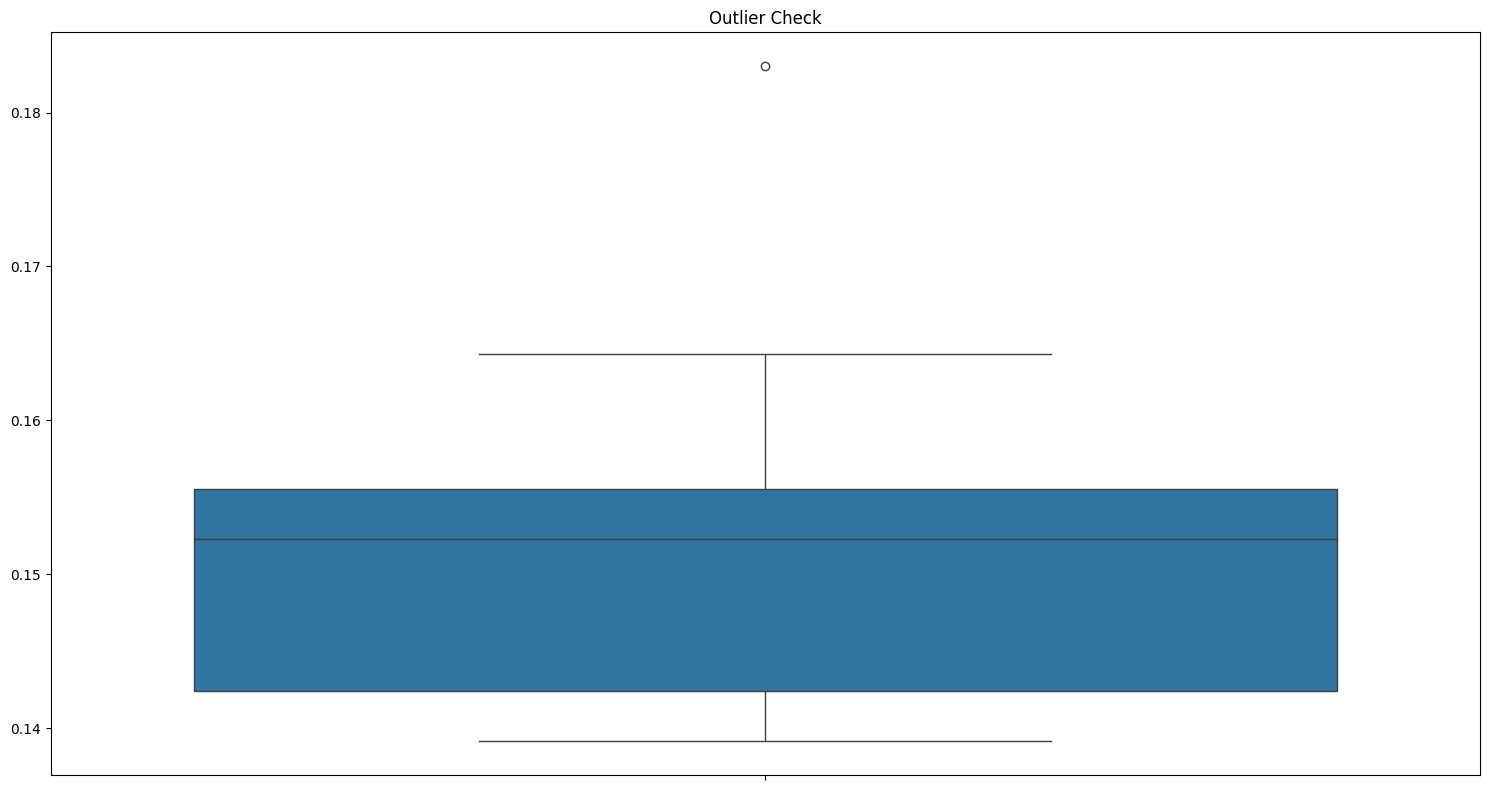

In [45]:
#outliers checking for top features only

nc= numerical_cols

plt.figure(figsize=(15, 8))  # Mengatur ukuran agar lebih lebar

#Membuat boxplot untuk semua kolom numerik
sns.boxplot(data=best_numerical_corr30)

#Menambahkan judul
plt.title("Outlier Check")

#Mengatur rotasi label sumbu x agar lebih terbaca
plt.xticks(rotation=45, ha='right')  # Rotasi 45 derajat dan menyelaraskan ke kanan

#Menampilkan plot
plt.tight_layout()  # Menyesuaikan layout agar tidak ada elemen yang tumpang tindih
plt.show()

### Categorical

In [46]:
def cramers_v(x, y):
    confusion_matrix = pd.crosstab(x, y)
    chi2 = chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()
    r, k = confusion_matrix.shape
    return np.sqrt(chi2 / (n * (min(r, k) - 1)))

#Filter categorical columns
categorical_cols = df1.select_dtypes(include=['object', 'category']).columns

#Calculate Cramér's V for each categorical feature with the target
cramers_v_results = {}
for col in categorical_cols:
    cramers_v_results[col] = cramers_v(df1[col], df1['cancer_type_detailed'])

#Convert to Series for easy sorting
cramers_v_series = pd.Series(cramers_v_results)

#Sort and get top 30 categorical correlations
best_categorical_corr30 = cramers_v_series.abs().sort_values(ascending=False).head(10)
print(best_categorical_corr30)

tumor_other_histologic_subtype    1.000000
oncotree_code                     1.000000
overall_survival_months           0.960507
nottingham_prognostic_index       0.616842
ahnak2_mut                        0.584826
kmt2d_mut                         0.502620
stab2_mut                         0.483617
pde4dip_mut                       0.482536
map3k1_mut                        0.355901
muc16_mut                         0.332294
dtype: float64


### Concat

In [47]:
#Combine both numerical and categorical correlations
combined_corr = pd.concat([best_numerical_corr30, best_categorical_corr30])

#Sort and get top 30 correlations overall
best_corr30 = combined_corr.sort_values(ascending=False).head(10)
print(best_corr30)

tumor_other_histologic_subtype    1.000000
oncotree_code                     1.000000
overall_survival_months           0.960507
nottingham_prognostic_index       0.616842
ahnak2_mut                        0.584826
kmt2d_mut                         0.502620
stab2_mut                         0.483617
pde4dip_mut                       0.482536
map3k1_mut                        0.355901
muc16_mut                         0.332294
dtype: float64


In [48]:
#Assuming 'best_corr30' is a Series with the column names as index
selected_columns = best_corr30.index.tolist()
#new df
df2 = df1[selected_columns]
df2['cancer_type_detailed'] = df.loc[:, 'cancer_type_detailed']
df2



C:\Users\Lenovo\AppData\Local\Temp\ipykernel_25052\1321185854.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['cancer_type_detailed'] = df.loc[:, 'cancer_type_detailed']


,tumor_other_histologic_subtype,oncotree_code,overall_survival_months,nottingham_prognostic_index,ahnak2_mut,kmt2d_mut,stab2_mut,pde4dip_mut,map3k1_mut,muc16_mut,cancer_type_detailed
0,Ductal/NST,IDC,140.5,6.044,noMut,noMut,noMut,noMut,noMut,noMut,Breast Invasive Ductal Carcinoma
1,Ductal/NST,IDC,8.463.333.333,4.02,noMut,noMut,noMut,noMut,noMut,noMut,Breast Invasive Ductal Carcinoma
2,Ductal/NST,IDC,163.7,4.03,noMut,noMut,noMut,noMut,noMut,noMut,Breast Invasive Ductal Carcinoma
3,Mixed,MDLC,16.493.333.330.000.000,4.05,noMut,noMut,noMut,noMut,noMut,noMut,Breast Mixed Ductal and Lobular Carcinoma
4,Mixed,MDLC,4.136.666.667,6.08,noMut,noMut,noMut,noMut,noMut,noMut,Breast Mixed Ductal and Lobular Carcinoma
...,...,...,...,...,...,...,...,...,...,...,...
1899,Lobular,ILC,1.968.666.667,5.05,noMut,noMut,noMut,noMut,R1482*,noMut,Breast Invasive Lobular Carcinoma
1900,Ductal/NST,IDC,4.473.333.333,5.04,noMut,P2931A,noMut,K1507_T1509del,noMut,noMut,Breast Invasive Ductal Carcinoma
1901,Ductal/NST,IDC,1.759.666.667,6.05,noMut,noMut,noMut,noMut,noMut,noMut,Breast Invasive Ductal Carcinoma
1902,Ductal/NST,IDC,8.623.333.333,5.05,V3102M,noMut,noMut,noMut,noMut,noMut,Breast Invasive Ductal Carcinoma


### Final Data

In [49]:
print(df2.to_string())

     tumor_other_histologic_subtype oncotree_code overall_survival_months nottingham_prognostic_index                                                 ahnak2_mut            kmt2d_mut                stab2_mut        pde4dip_mut                                      map3k1_mut                                         muc16_mut                       cancer_type_detailed
0                        Ductal/NST           IDC                   140.5                       6.044                                                      noMut                noMut                    noMut              noMut                                           noMut                                             noMut           Breast Invasive Ductal Carcinoma
1                        Ductal/NST           IDC           8.463.333.333                        4.02                                                      noMut                noMut                    noMut              noMut                                         

In [50]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1904 entries, 0 to 1903
Data columns (total 11 columns):
 #   Column                          Non-Null Count  Dtype   
---  ------                          --------------  -----   
 0   tumor_other_histologic_subtype  1904 non-null   category
 1   oncotree_code                   1904 non-null   category
 2   overall_survival_months         1904 non-null   category
 3   nottingham_prognostic_index     1904 non-null   category
 4   ahnak2_mut                      1904 non-null   category
 5   kmt2d_mut                       1904 non-null   category
 6   stab2_mut                       1904 non-null   category
 7   pde4dip_mut                     1904 non-null   category
 8   map3k1_mut                      1904 non-null   category
 9   muc16_mut                       1904 non-null   category
 10  cancer_type_detailed            1889 non-null   object  
dtypes: category(10), object(1)
memory usage: 172.1+ KB


In [51]:
# Hapus titik sebagai pemisah ribuan dan konversikan ke float
df2['overall_survival_months'] = df2['overall_survival_months'].str.replace('.', '').astype(float)
df2['nottingham_prognostic_index'] = df2['nottingham_prognostic_index'].str.replace('.', '').astype(float)

df2


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_25052\922648803.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['overall_survival_months'] = df2['overall_survival_months'].str.replace('.', '').astype(float)
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_25052\922648803.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['nottingham_prognostic_index'] = df2['nottingham_prognostic_index'].str.replace('.', '').astype(float)


,tumor_other_histologic_subtype,oncotree_code,overall_survival_months,nottingham_prognostic_index,ahnak2_mut,kmt2d_mut,stab2_mut,pde4dip_mut,map3k1_mut,muc16_mut,cancer_type_detailed
0,Ductal/NST,IDC,1.405000e+03,6044.0,noMut,noMut,noMut,noMut,noMut,noMut,Breast Invasive Ductal Carcinoma
1,Ductal/NST,IDC,8.463333e+09,402.0,noMut,noMut,noMut,noMut,noMut,noMut,Breast Invasive Ductal Carcinoma
2,Ductal/NST,IDC,1.637000e+03,403.0,noMut,noMut,noMut,noMut,noMut,noMut,Breast Invasive Ductal Carcinoma
3,Mixed,MDLC,1.649333e+16,405.0,noMut,noMut,noMut,noMut,noMut,noMut,Breast Mixed Ductal and Lobular Carcinoma
4,Mixed,MDLC,4.136667e+09,608.0,noMut,noMut,noMut,noMut,noMut,noMut,Breast Mixed Ductal and Lobular Carcinoma
...,...,...,...,...,...,...,...,...,...,...,...
1899,Lobular,ILC,1.968667e+09,505.0,noMut,noMut,noMut,noMut,R1482*,noMut,Breast Invasive Lobular Carcinoma
1900,Ductal/NST,IDC,4.473333e+09,504.0,noMut,P2931A,noMut,K1507_T1509del,noMut,noMut,Breast Invasive Ductal Carcinoma
1901,Ductal/NST,IDC,1.759667e+09,605.0,noMut,noMut,noMut,noMut,noMut,noMut,Breast Invasive Ductal Carcinoma
1902,Ductal/NST,IDC,8.623333e+09,505.0,V3102M,noMut,noMut,noMut,noMut,noMut,Breast Invasive Ductal Carcinoma


In [52]:
df2['cancer_type_detailed'] = df2['cancer_type_detailed'].astype('category') 

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_25052\3911783237.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['cancer_type_detailed'] = df2['cancer_type_detailed'].astype('category')


In [53]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1904 entries, 0 to 1903
Data columns (total 11 columns):
 #   Column                          Non-Null Count  Dtype   
---  ------                          --------------  -----   
 0   tumor_other_histologic_subtype  1904 non-null   category
 1   oncotree_code                   1904 non-null   category
 2   overall_survival_months         1904 non-null   float64 
 3   nottingham_prognostic_index     1904 non-null   float64 
 4   ahnak2_mut                      1904 non-null   category
 5   kmt2d_mut                       1904 non-null   category
 6   stab2_mut                       1904 non-null   category
 7   pde4dip_mut                     1904 non-null   category
 8   map3k1_mut                      1904 non-null   category
 9   muc16_mut                       1904 non-null   category
 10  cancer_type_detailed            1889 non-null   category
dtypes: category(9), float64(2)
memory usage: 93.4 KB


# Data Model

## Splits

In [54]:
#input and target
X= df2.drop(['cancer_type_detailed'], axis=1)
y= df2['cancer_type_detailed']

In [55]:
X

,tumor_other_histologic_subtype,oncotree_code,overall_survival_months,nottingham_prognostic_index,ahnak2_mut,kmt2d_mut,stab2_mut,pde4dip_mut,map3k1_mut,muc16_mut
0,Ductal/NST,IDC,1.405000e+03,6044.0,noMut,noMut,noMut,noMut,noMut,noMut
1,Ductal/NST,IDC,8.463333e+09,402.0,noMut,noMut,noMut,noMut,noMut,noMut
2,Ductal/NST,IDC,1.637000e+03,403.0,noMut,noMut,noMut,noMut,noMut,noMut
3,Mixed,MDLC,1.649333e+16,405.0,noMut,noMut,noMut,noMut,noMut,noMut
4,Mixed,MDLC,4.136667e+09,608.0,noMut,noMut,noMut,noMut,noMut,noMut
...,...,...,...,...,...,...,...,...,...,...
1899,Lobular,ILC,1.968667e+09,505.0,noMut,noMut,noMut,noMut,R1482*,noMut
1900,Ductal/NST,IDC,4.473333e+09,504.0,noMut,P2931A,noMut,K1507_T1509del,noMut,noMut
1901,Ductal/NST,IDC,1.759667e+09,605.0,noMut,noMut,noMut,noMut,noMut,noMut
1902,Ductal/NST,IDC,8.623333e+09,505.0,V3102M,noMut,noMut,noMut,noMut,noMut


## Encoding

In [56]:
def one_hot_encode_all(X):
    # Automatically one-hot encode all categorical variables
    X = pd.get_dummies(X, drop_first=True)
    return X

# Example usage
# Assuming 'df' is your dataframe with categorical columns
X = one_hot_encode_all(X)


In [64]:
X

,overall_survival_months,nottingham_prognostic_index,tumor_other_histologic_subtype_Lobular,tumor_other_histologic_subtype_Medullary,tumor_other_histologic_subtype_Metaplastic,tumor_other_histologic_subtype_Mixed,tumor_other_histologic_subtype_Mucinous,tumor_other_histologic_subtype_Other,tumor_other_histologic_subtype_Tubular/ cribriform,oncotree_code_IDC,...,muc16_mut_V4711L,muc16_mut_V4927L,muc16_mut_V5565I Q3306K,muc16_mut_V5913M,muc16_mut_V605F,muc16_mut_V7378E,muc16_mut_V8260M,muc16_mut_V9550F,muc16_mut_V9854L,muc16_mut_W2883*
0,1.405000e+03,6044.0,False,False,False,False,False,False,False,True,...,False,False,False,False,False,False,False,False,False,False
1,8.463333e+09,402.0,False,False,False,False,False,False,False,True,...,False,False,False,False,False,False,False,False,False,False
2,1.637000e+03,403.0,False,False,False,False,False,False,False,True,...,False,False,False,False,False,False,False,False,False,False
3,1.649333e+16,405.0,False,False,False,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,4.136667e+09,608.0,False,False,False,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1899,1.968667e+09,505.0,True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1900,4.473333e+09,504.0,False,False,False,False,False,False,False,True,...,False,False,False,False,False,False,False,False,False,False
1901,1.759667e+09,605.0,False,False,False,False,False,False,False,True,...,False,False,False,False,False,False,False,False,False,False
1902,8.623333e+09,505.0,False,False,False,False,False,False,False,True,...,False,False,False,False,False,False,False,False,False,False


In [58]:
# List of columns to exclude from conversion
exclude_columns = ['overall_survival_months', 'nottingham_prognostic_index']

# Convert only boolean columns to 0 and 1, except the excluded columns
for col in X.columns:
    if col not in exclude_columns and X[col].dtype == 'bool':
        X[col] = X[col].astype(int)

X


,overall_survival_months,nottingham_prognostic_index,tumor_other_histologic_subtype_Lobular,tumor_other_histologic_subtype_Medullary,tumor_other_histologic_subtype_Metaplastic,tumor_other_histologic_subtype_Mixed,tumor_other_histologic_subtype_Mucinous,tumor_other_histologic_subtype_Other,tumor_other_histologic_subtype_Tubular/ cribriform,oncotree_code_IDC,...,muc16_mut_V4711L,muc16_mut_V4927L,muc16_mut_V5565I Q3306K,muc16_mut_V5913M,muc16_mut_V605F,muc16_mut_V7378E,muc16_mut_V8260M,muc16_mut_V9550F,muc16_mut_V9854L,muc16_mut_W2883*
0,1.405000e+03,6044.0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1,8.463333e+09,402.0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2,1.637000e+03,403.0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
3,1.649333e+16,405.0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,4.136667e+09,608.0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1899,1.968667e+09,505.0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1900,4.473333e+09,504.0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1901,1.759667e+09,605.0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1902,8.623333e+09,505.0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


## TrainTest Splits

In [60]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Feature Scaling (Normalization)

In [61]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)  # Fit and transform the training set
X_test_scaled = scaler.transform(X_test)  # Only transform the test set

## ANN Model

In [62]:
model = Sequential()

In [63]:
#Input Layer and First Hidden Layer (with 64 neurons and ReLU activation)
model.add(Dense(64, input_dim=X_train.shape[1], activation='relu'))
#Second Hidden Layer (with 32 neurons and ReLU activation)
model.add(Dense(32, activation='relu'))
#Output Layer (Assume binary classification - single neuron with sigmoid activation)
model.add(Dense(1, activation='sigmoid'))
#Compile the Model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])


c:\Users\Lenovo\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [70]:
le = LabelEncoder()
# Convert categorical labels in y_train and y_test to 0 and 1
y_train = le.fit_transform(y_train)
y_test = le.transform(y_test)

In [71]:
history = model.fit(X_train_scaled, y_train, epochs=50, batch_size=32, validation_data=(X_test_scaled, y_test))

Epoch 1/50
48/48 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.5281 - loss: 0.3871 - val_accuracy: 0.7927 - val_loss: -2.8753
Epoch 2/50
48/48 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8020 - loss: -5.3197 - val_accuracy: 0.7927 - val_loss: -16.7069
Epoch 3/50
48/48 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8015 - loss: -26.2320 - val_accuracy: 0.7927 - val_loss: -65.4106
Epoch 4/50
48/48 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7858 - loss: -101.7400 - val_accuracy: 0.7927 - val_loss: -182.2187
Epoch 5/50
48/48 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7968 - loss: -236.6142 - val_accuracy: 0.7927 - val_loss: -406.7872
Epoch 6/50
48/48 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7856 - loss: -536.9836 - val_accuracy: 0.7927 - val_loss: -774.0375
Epoch 7/50
48/48 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7960 - loss: -927.2288 - val_accuracy: 0.7927 - val_loss: -1299.0746
Epoch 8/50
48/48 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7859 - loss: -1709.07

In [72]:
loss, accuracy = model.evaluate(X_test_scaled, y_test)
print(f"Test Accuracy: {accuracy*100:.2f}%")

12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8031 - loss: -469873.8438 
Test Accuracy: 79.27%


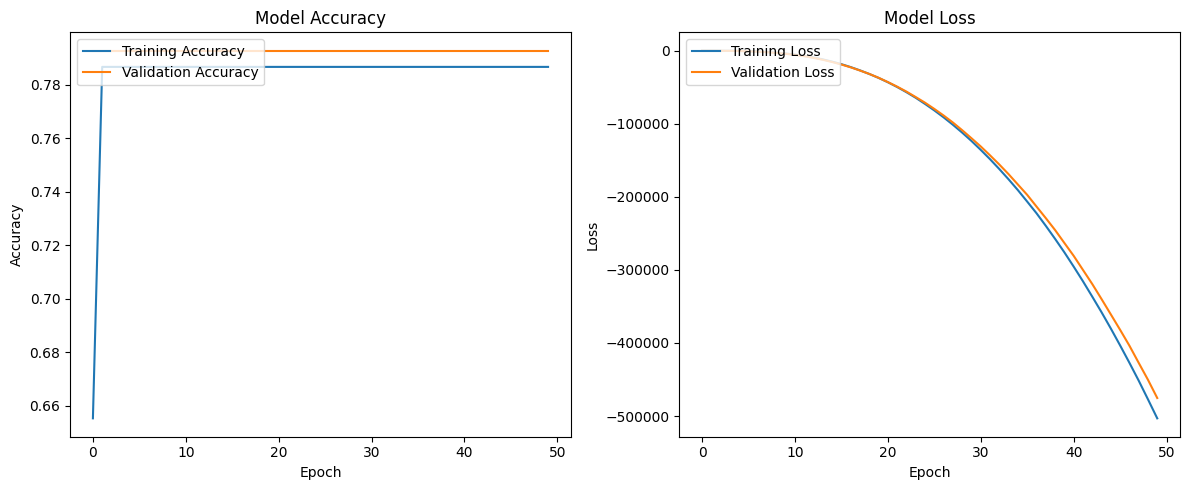

In [73]:
import matplotlib.pyplot as plt

# Plot training & validation accuracy values
plt.figure(figsize=(12, 5))

# Accuracy plot
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='upper left')

# Loss plot
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='upper left')

plt.tight_layout()
plt.show()


In [74]:
from sklearn.metrics import classification_report

y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred, zero_division=0))

12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         4
           1       0.79      1.00      0.88       302
           2       0.00      0.00      0.00        35
           3       0.00      0.00      0.00         4
           4       0.00      0.00      0.00        33
           6       0.00      0.00      0.00         3

    accuracy                           0.79       381
   macro avg       0.13      0.17      0.15       381
weighted avg       0.63      0.79      0.70       381

